In [80]:
 # Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
#from st import sem
from scipy.stats import linregress

In [81]:
DC_crime = pd.read_csv('Resources/clean_crime_data.csv')


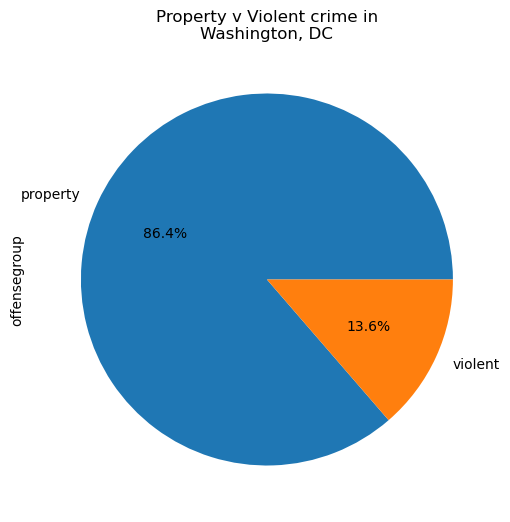

False    24200
True      3825
Name: offensegroup, dtype: int64

In [82]:
DC_crime["offensegroup"].value_counts().plot(kind='pie', figsize=(6,8), autopct="%1.1f%%")
plt.title("""Property v Violent crime in
Washington, DC""")

plt.show()
(DC_crime['offensegroup'] == "violent").value_counts()

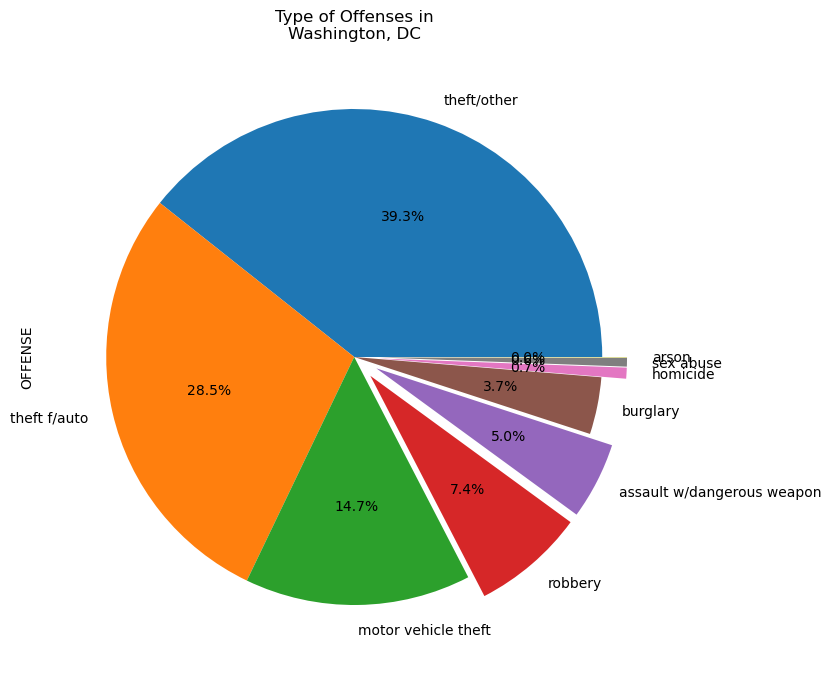

In [83]:
explode = (0,0,0,0.1,0.1,0,0.1,0.1,0.1)
DC_crime["OFFENSE"].value_counts().plot(kind='pie', figsize=(8,10), explode = explode, autopct="%1.1f%%")
plt.title("""Type of Offenses in
Washington, DC""")

plt.show()


In [103]:
mean = (DC_crime.groupby('START_DATE')['OFFENSE'].count()).mean()
median = (DC_crime.groupby('START_DATE')['OFFENSE'].count()).median()
mode = (DC_crime.groupby('START_DATE')['OFFENSE'].count()).mode()

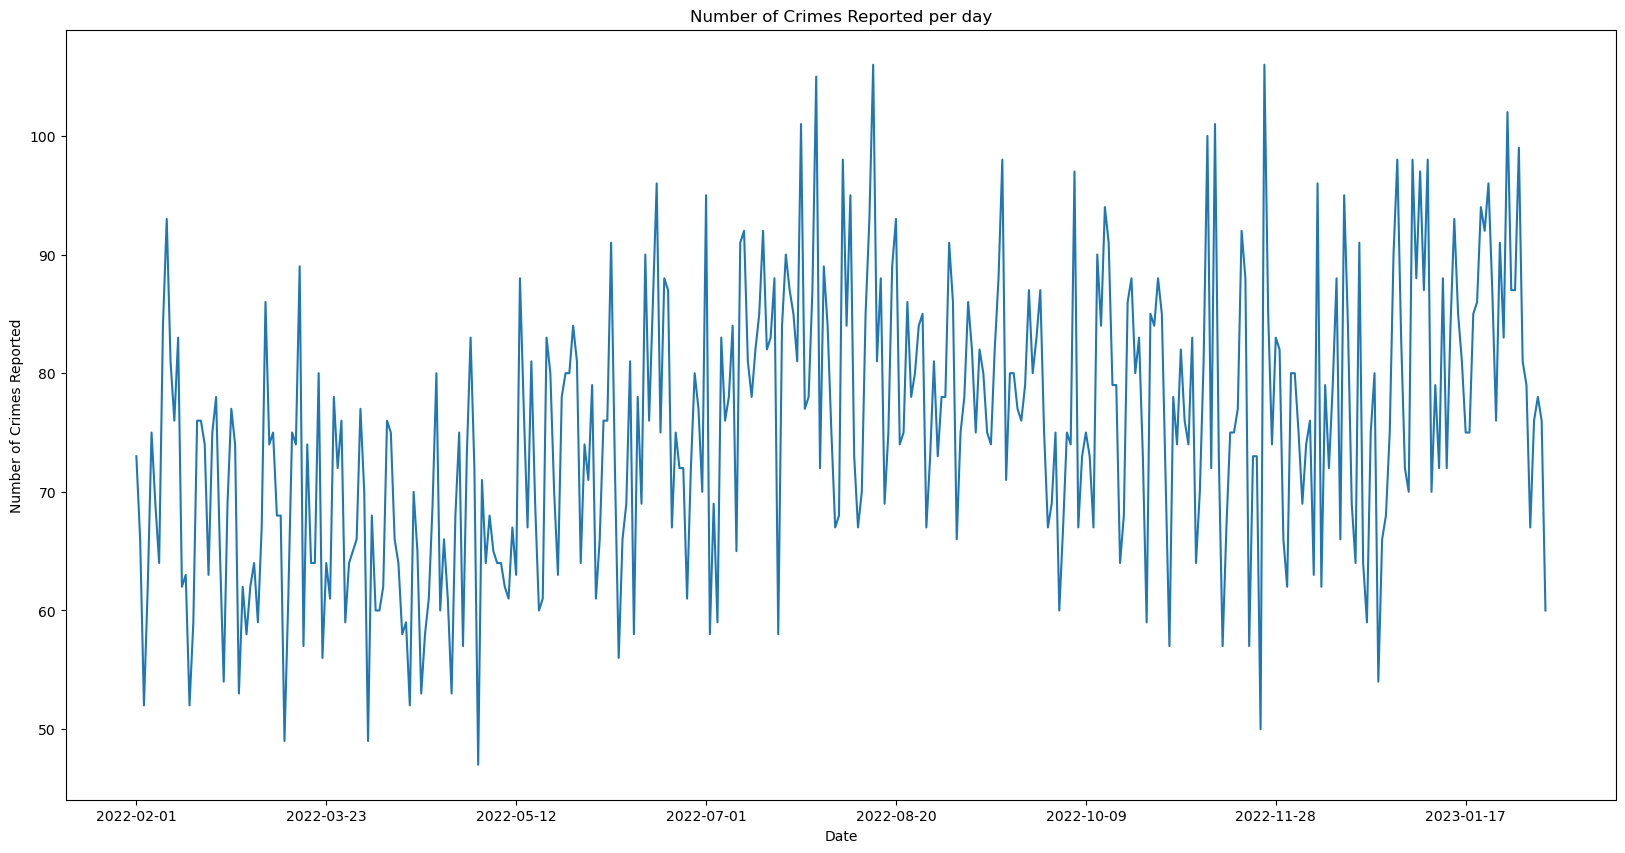

<Figure size 640x480 with 0 Axes>

In [94]:
DC_crime.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10))

# Set the xlabel and ylabel using class methods
plt.ylabel("Number of Crimes Reported")
plt.xlabel("Date")
plt.title("Number of Crimes Reported per day")
plt.show()
plt.tight_layout()


In [95]:
DC_crime['OFFENSE'].unique()

array(['robbery', 'theft f/auto', 'motor vehicle theft', 'theft/other',
       'assault w/dangerous weapon', 'homicide', 'sex abuse', 'burglary',
       'arson'], dtype=object)

In [92]:
robbery = DC_crime.loc[DC_crime["OFFENSE"] == "robbery"]
theft_auto = DC_crime.loc[DC_crime["OFFENSE"] == "theft f/auto"]
car_theft = DC_crime.loc[DC_crime["OFFENSE"] == "motor vehicle theft"]
other_theft = DC_crime.loc[DC_crime["OFFENSE"] == "motor vehicle theft"]
aussault = DC_crime.loc[DC_crime["OFFENSE"] == "assault w/dangerous weapon"]
homicide = DC_crime.loc[DC_crime["OFFENSE"] == "homicide"]
abuse = DC_crime.loc[DC_crime["OFFENSE"] == "sex abuse"]
burglary = DC_crime.loc[DC_crime["OFFENSE"] == "burglary"]
arson = DC_crime.loc[DC_crime["OFFENSE"] == "arson"]

arson.value_counts()

# nu_car_theft, nu_other_theft, nu_aussault, nu_homicide, nu_abuse, nu_burglary, nu_arson 

Unnamed: 0  YEAR  START_DATE  offensegroup  OFFENSE  offense-text  offensekey      START_TIME
7782        2022  2022-04-30  property      arson    arson         property|arson  16:22:00      1
8329        2022  2022-09-19  property      arson    arson         property|arson  05:32:00      1
9206        2023  2022-12-12  property      arson    arson         property|arson  20:15:00      1
39019       2022  2022-02-09  property      arson    arson         property|arson  13:12:00      1
41464       2022  2022-08-15  property      arson    arson         property|arson  22:00:00      1
43828       2023  2023-01-16  property      arson    arson         property|arson  14:15:00      1
44652       2023  2023-01-26  property      arson    arson         property|arson  18:26:00      1
44753       2023  2023-01-30  property      arson    arson         property|arson  08:00:00      1
dtype: int64

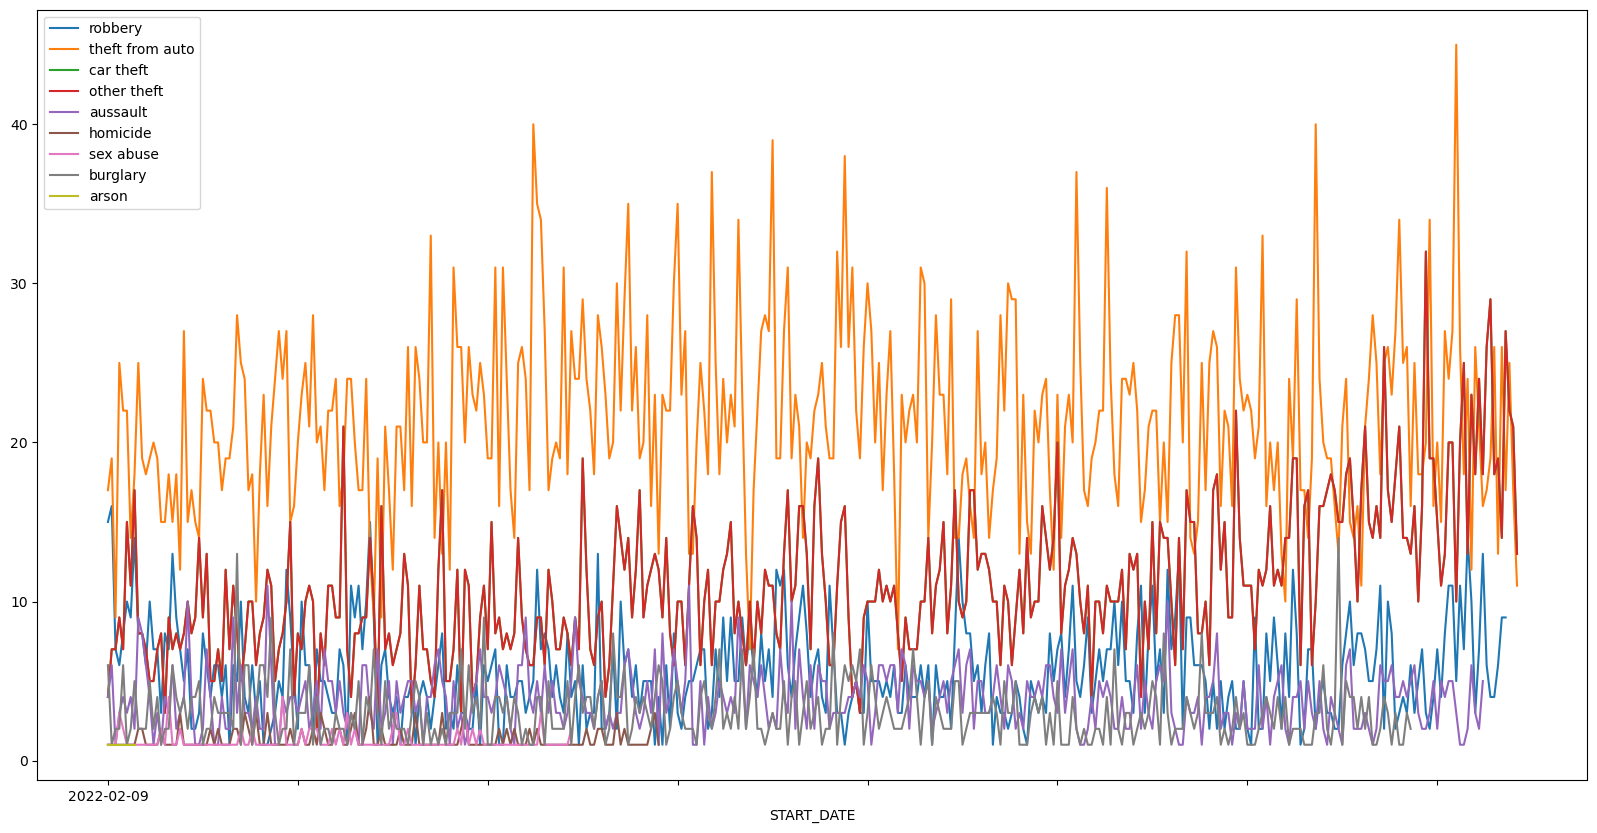

In [96]:
# plot lines
# x = DC_crime.groupby('START_DATE').count()
robbery.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "robbery")
theft_auto.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "theft from auto")
car_theft.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "car theft")
other_theft.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "other theft")
aussault.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "aussault")
homicide.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "homicide")
abuse.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "sex abuse")
burglary.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "burglary")
arson.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "arson")


plt.legend()
plt.show()

In [ ]:
# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
#     # Capomulin
# capomulin_quartiles = capo_vol.quantile([.25,.5,.75])
# capomulin_lowerq = capomulin_quartiles[0.25]
# capomulin_upperq = capomulin_quartiles[0.75]
# capomulin_IQR = capomulin_upperq-capomulin_lowerq

# print(f"The lower quartile of Capomulin is: {capomulin_lowerq}")
# print(f"The upper quartile of Capomulin is: {capomulin_upperq}")
# print(f"The interquartile range of Capomulin is: {capomulin_IQR}")
# print(f"The the median of Capomulin is: {capomulin_quartiles[0.5]} ")

# capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_IQR)
# capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_IQR)

# print(f"Values below {capomulin_lower_bound} could be outliers.")
# print(f"Values above {capomulin_upper_bound} could be outliers.")

# outlier_capo = four_drug_volumn[(four_drug_volumn["Tumor Volume (mm3)"] < capomulin_lower_bound) | 
#                                  (four_drug_volumn["Tumor Volume (mm3)"] > capomulin_upper_bound)]